# Push SVGD

Stein variatianal gradient descent (SVGD), introduced here in [this paper](https://arxiv.org/abs/1608.04471) seeks to approximate a target distribution by moving particles to fit the target distribution.

### Dataset

We setup the dataset with $N$ points of dimension $D$ in the next cell.

In [2]:
from bdl import RandDataset

D = 1
batch_size = 128
N = 1
dataset = RandDataset(batch_size, N, D)
dataset

```py
class RandDataset(Dataset):
    def __init__(self, batch_size, N, D):
        self.xs = torch.randn(batch_size*N, D)
        self.ys = torch.randn(batch_size*N, 1)

    def __len__(self):
        return len(self.xs)

    def __getitem__(self, idx):
        return self.xs[idx], self.ys[idx]
```

## Plotting the Dataset 

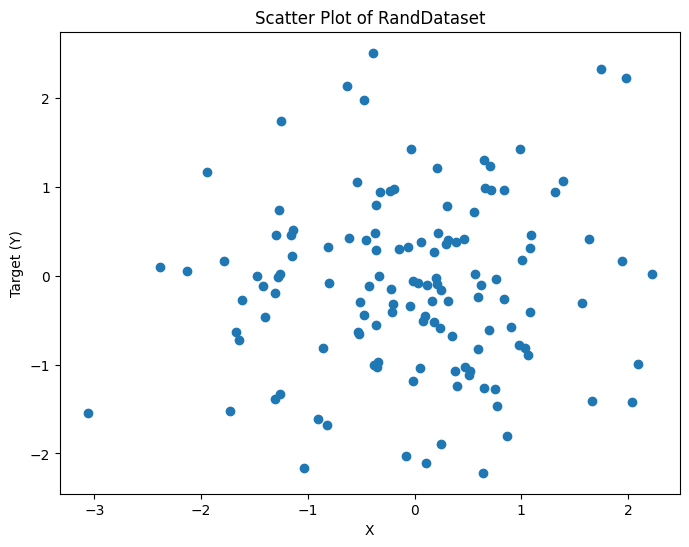

In [3]:
import matplotlib.pyplot as plt


# Extract the data
xs = dataset.xs
ys = dataset.ys

# Plot the data without a colorbar
plt.figure(figsize=(8, 6))
plt.scatter(xs, ys)
plt.title('Scatter Plot of RandDataset')
plt.xlabel('X')
plt.ylabel('Target (Y)')
plt.show()


### Neural Network

We create a simple neural network (NN). This NN contains two fully-connected layers of dimension $D$ and uses a ReLU activation function. 

In [2]:
from bdl import MiniNN

```py
class MiniNN(nn.Module):
    def __init__(self, D):
        super(MiniNN, self).__init__()
        self.fc1 = nn.Linear(D, D)
        self.fc2 = nn.Linear(D, D)

    def forward(self, x):
        x = self.fc1(x)
        x = torch.nn.ReLU()(x)
        x = self.fc2(x)
        return x
```

# Particles
A particle in SVGD is essentially a sample of the target distribution. We iteratively move each particle to more closely match the target distribution with each step. 

# Running SVGD with Push

In [5]:
import torch
from torch.utils.data import DataLoader
import push.bayes.stein_vgd

dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
epochs = 10
particles = 10
cache_size = 3
view_size = 2
devices = 1
svgd_state = {
            "D": D,
            "N": N,
        }

push.bayes.stein_vgd.train_svgd(
        dataloader, torch.nn.MSELoss(),
        epochs, particles,
        MiniNN, D,
        lengthscale=1.0, lr=1e-3, prior=None,
        cache_size=cache_size, view_size=view_size, num_devices=devices,
        svgd_entry=push.bayes.stein_vgd._svgd_leader, svgd_state=svgd_state
    )

  0%|          | 0/10 [00:00<?, ?it/s]/home/jtsegaye/push/push/bayes/stein_vgd.py:99: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  losses += [torch.mean(torch.tensor(loss))]
 30%|███       | 3/10 [00:00<00:01,  4.87it/s]

Average loss 1.129563331604004
Average loss 1.1290178298950195
Average loss 1.1284737586975098
Average loss 1.1279314756393433
Average loss 1.1273906230926514
Average loss 1.1268513202667236


 70%|███████   | 7/10 [00:01<00:00,  8.15it/s]

Average loss 1.126313328742981
Average loss 1.125777006149292
Average loss 1.1252423524856567


100%|██████████| 10/10 [00:01<00:00,  7.32it/s]


Average loss 1.124708890914917


[[tensor([[-0.5018]]),
  tensor([-0.0146]),
  tensor([[-0.1045]]),
  tensor([0.5494])],
 [tensor([[-0.2697]]),
  tensor([-0.7861]),
  tensor([[0.9004]]),
  tensor([0.6909])],
 [tensor([[-0.6144]]), tensor([0.4019]), tensor([[0.1510]]), tensor([0.2745])],
 [tensor([[-0.2532]]),
  tensor([-0.4474]),
  tensor([[-0.0210]]),
  tensor([-0.5908])],
 [tensor([[-0.5249]]),
  tensor([-0.3968]),
  tensor([[0.0986]]),
  tensor([-0.3735])],
 [tensor([[-0.2767]]),
  tensor([-0.6107]),
  tensor([[0.9933]]),
  tensor([0.0596])],
 [tensor([[0.3886]]),
  tensor([-0.9218]),
  tensor([[-0.6591]]),
  tensor([-0.9042])],
 [tensor([[0.9194]]), tensor([0.8958]), tensor([[-0.8129]]), tensor([0.4501])],
 [tensor([[-0.8457]]),
  tensor([0.2612]),
  tensor([[-0.5516]]),
  tensor([0.3877])],
 [tensor([[-0.5957]]), tensor([0.3260]), tensor([[0.6869]]), tensor([0.9117])]]